# Measurement of Coefficient of Drag

## Description of Data
I have a file `freefall.mp4` containing a high frame rate video of a pickleball falling.
Behind it there is a 2x8 foot peg board to assist in measuring the ball location.

My goal is to determine, empirically, a coefficient of drag for a pickleball. At the moment, I have only one
video of it. The ball is dropped in front of a 2 foot by 8 foot peg board. I would like to use python
to calculate the locations of the ball from the video. Ideally, a first step might be to trim the video to
a narrower "window" just to reduce the amount of image data that is not relevant.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

What a fun project! Measuring drag coefficients empirically from video is a classic physics experiment, and Python is a great tool for this.

Before we dive into trimming the video, let me ask a couple of quick questions:

1. **Your Python comfort level**: Are you familiar with libraries like `opencv` (cv2) for video processing, or would this be new territory?

2. **The video itself**: Do you know the frame rate of your video? (This will be important later for calculating velocities.)

3. **Trimming approach**: When you say "narrower window," are you thinking of:
   - Cropping spatially (cutting out the left/right sides to focus on the pegboard region), or
   - Trimming temporally (cutting frames before/after the ball is in view), or
   - Both?

Once I know a bit more about where you're starting from, we can figure out the best first step together!

My goal is to measure the vertical location of a ball in each frame of a video. There is only 
one ball involved. Behind the ball is a 2 foot by 8 foot peg board to help calibrate our measurement.
An initial goal will be to find the ball and trim the width of the video to reduce the amount
of video processing. So we might start by viewing the first frame to determine the width of
the frame of interest. The video is in `.mp4` format.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Let's start by loading the video and viewing the first frame so you can see what you're working with and decide where to trim.

Since you're working with `.mp4` video, you'll need `opencv` (cv2). Do you already have it installed, or would you like to install it first with `!pip install opencv-python`?

Once we have that ready, we can write a couple of lines to:
1. Open the video file
2. Read and display the first frame

Would you like me to show you those lines, or would you prefer to try writing them yourself first?

Yes. I have some familiarity with cv2. That seems like the best tool for this. Yes, cropping left and right. I believe the frame rate is 180 fps.
I think that may be available in the mp4 metadata. You are right. Our first goal is to just create a file for numerical analysis.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! With 180 fps, you'll have excellent temporal resolution for tracking the ball's motion.

Let's start simple. Try opening the video and displaying the first frame so you can see the full view and decide where to crop:

```python
import cv2
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('freefall.mp4')
ret, frame = cap.read()
```

Then display it with matplotlib so you can see the pixel coordinates. Since cv2 reads in BGR format, you'll want to convert to RGB for proper color display.

Can you give that a try and show the frame? Once you see it, you can identify the left and right x-coordinates where you want to crop.

We will need to advance some number of frames before the ball is visible.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good observation! The ball isn't visible in the first frame yet. Let's advance through frames until you can see it.

You can loop through frames and display them. Try something like:

```python
for i in range(50):  # advance 50 frames
    ret, frame = cap.read()
```

Then display that frame to see if the ball is visible. You might need to adjust the number depending on when the ball enters the frame.

Want to try advancing some frames and checking?

## imports and functions

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def get_video_parameters(cap):
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    return fps, width, height, frame_count

In [ ]:
def view_frame(frame, h=10, w=12):
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(h, w))
    plt.imshow(frame_rgb)
    plt.gca().xaxis.set_ticks_position('both')
    plt.tick_params(top=True, labeltop=True)
    plt.show()


def show_frames_side_by_side(frame1, frame2, title1='Frame 1', title2='Frame 2'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 10))
    
    frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
    frame2_rgb = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
    
    ax1.imshow(frame1_rgb)
    ax1.set_title(title1)
    ax1.axis('on')
    ax1.xaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax1.tick_params(top=True, labeltop=True)

    ax2.imshow(frame2_rgb)
    ax2.set_title(title2)
    ax2.axis('on')
    ax2.xaxis.set_ticks_position('both')
    ax2.tick_params(top=True, labeltop=True)
    
    plt.tight_layout()
    plt.show()




In [ ]:
def get_frame(cap, n):
    cap.set(cv2.CAP_PROP_POS_FRAMES, n)
    return cap.read()


In [ ]:
def detect_and_draw_ball(frame, mask):
    # Find centroid
    moments = cv2.moments(mask)
    cx = int(moments['m10'] / moments['m00'])
    cy = int(moments['m01'] / moments['m00'])
    
    # Find contours and fit circle for radius
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        (x, y), radius = cv2.minEnclosingCircle(largest_contour)
        radius = int(radius)
    else:
        radius = 0
    
    # Draw on frame
    result = frame.copy()
    cv2.circle(result, (cx, cy), radius, (0, 255, 0), 2)  # Green circle
    cv2.circle(result, (cx, cy), 5, (255, 0, 0), -1)  # Blue centroid dot
    
    return result, cx, cy, radius

In [ ]:
def rotate_points(points, angle_degrees):
    ''' Apply a rotational transform'''
    angle_rad = np.radians(angle_degrees)
    cos_a, sin_a = np.cos(angle_rad), np.sin(angle_rad)
    rotation_matrix = np.array([[cos_a, -sin_a], [sin_a, cos_a]])
    return points @ rotation_matrix.T


## Video - Characteristics and Location of the File

### Path

In [ ]:
freefall_path = "../data/freefall.mp4"

### Characteristics of the video

In [ ]:
cap = cv2.VideoCapture(freefall_path)

In [ ]:
fps, width, height, frame_count = get_video_parameters(cap)
fps, width, height, frame_count

(54.7087743509494, 2160, 3840, 74)

## Goal - How can we identify the ball
And get its location

### Find the first and last frames that have a full ball.

#### Via experimentation - frames 31 and 63

In [ ]:
ntop = 31
nbottom = 63
ret_top, top = get_frame(cap, ntop)
ret_bottom, bottom = get_frame(cap, nbottom)
if not ret_top or not ret_bottom:
    print(f"top frame {ret_top} bottom frame {ret_bottom}")

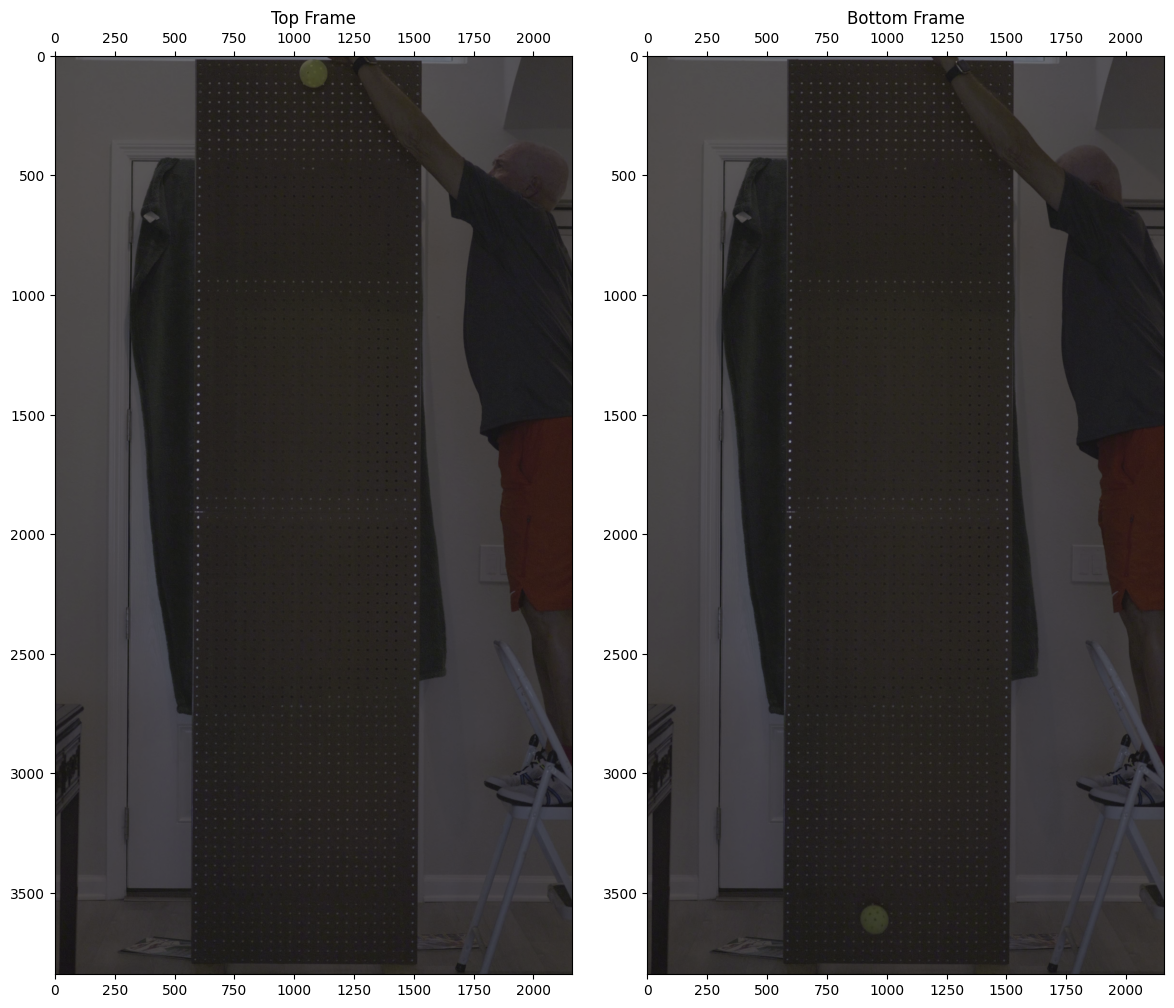

In [ ]:
show_frames_side_by_side(top, bottom, title1='Top Frame', title2='Bottom Frame')

### AI Prompt
I am successful in showing frame 11 (or 12?) but not frame_count - 5 Is it possible that there really are not 74 frames. I actually think
that might be the case.
### AI Response
You're right to be suspicious! The `CAP_PROP_FRAME_COUNT` property can be unreliable with some video formats, especially `.mp4` files. It often returns incorrect values.

A good way to verify the actual frame count is to loop through the video and count frames manually:

```python
cap.release()  # Release the current capture
cap = cv2.VideoCapture(freefall_path)
actual_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    actual_count += 1
print(f"Actual frame count: {actual_count}")
```

Want to try that and see what the real frame count is?

In [ ]:
cap.release()  # Release the current capture
cap = cv2.VideoCapture(freefall_path)
actual_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    actual_count += 1
print(f"Actual frame count: {actual_count}")

Actual frame count: 70


OK. So the actual frame count as calculated turned out to be 70. It looks like we need frames 11 to 63, cropping between 800 and 1200.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! So you have 53 frames (from 11 to 63 inclusive) showing the ball's fall, and you want to crop horizontally to x-coordinates 800 to 1200. That's a nice narrow window focused on the pegboard and ball.

Now you need to decide: do you want to create a new cropped video file, or would you prefer to extract the cropped frames directly into a numpy array for analysis?

Which approach sounds better for your drag coefficient calculations?

### Problem 1 - Automatically identify the ball in a frame 

That is a good question. I think that it would be useful to create a new video. That way any future analysis could be done without
any "video management".  I suppose we could do something like crop it into some sort of numpy array and release the memory of the 
original video. Before we do the cropping, perhaps we should figure out how to "calibrate". I know that the ball fell vertically.
However, it definitely is moving right to left in the images. That should be due to the camera being out of level, I think.

It is also quite possible that the pegboard is also not perfectly vertical. Can we some how correct for the camera using images
11 and 63? Then we could also investigate, after correcting for the camera, whether the pegboard background was not vertical.

Can we capture the position of the bottom of the ball in each frame. From that we can correct for the camera. We could also
measure versus the board how much it moved.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Excellent thinking! You're absolutely right that we need to handle the camera tilt before doing physics analysis. If the camera isn't level, the apparent horizontal motion isn't real ball motion—it's just perspective.

Here's a systematic approach:

**Step 1: Find the ball position in frames 11 and 63**
If the ball is falling vertically but appears to move horizontally, that horizontal drift tells us the camera angle. We can use those two positions to calculate the tilt angle and correct all frames.

**Step 2: Apply the rotation correction**
Once we know the angle, we can rotate all frames so the ball's path becomes truly vertical.

**Step 3: Then check the pegboard**
After camera correction, if there's still drift, that would indicate the pegboard itself wasn't vertical.

For finding the ball position, what method are you thinking? Since it's a pickleball (likely yellow-green), we could:
- Use color thresholding to isolate the ball
- Use circle detection (Hough circles)
- Manual clicking on frames 11 and 63 to get a quick initial calibration

Which approach would you like to try first?

I have played with Hough a bit. I found that it took a lot of experimentation. That said, IIRC, when I did that months ago, I did it against the whole video.
That was pretty time-consuming. So I think maybe, we start with just one frame. Make a copy of the frame and crop it. Use that to determine what technique
might work best. One complication, I found color investigation was awkward because there is a significant range in the colors across the ball. The ball
also has holes. And the lighting affects the color as well. Also, although the ball is fairly round, the images of it will be less so as the speed increases.

I am going to try to optimize the lighting for very fast shutter to help with that. But I also will want a higher frame rate to get more data for regression.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great plan! Starting with a single frame to experiment with detection methods is much more efficient than processing the whole video repeatedly.

So let's work with one frame first. Which frame would you like to use for testing? Maybe pick one from the middle of the fall where the ball is moving at a moderate speed—that way it won't be too blurred but also not trivially easy.

Once you choose a frame and crop it, you can try different approaches (color thresholding, edge detection, Hough circles, etc.) and see what works best for your specific lighting and ball appearance.

Which frame number do you want to start with for your detection experiments?

Frame 31 should work

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Frame 31 it is. Now you can grab that frame and create a cropped version (say, x from 800 to 1200) to use for testing your ball detection methods.

Want to try cropping frame 31 and displaying it? The syntax for cropping in numpy is `frame[y1:y2, x1:x2]` if you need a reminder.

#### Crop the frames to reduce processing data that will not contain the ball.

In [ ]:
top_cropped = top[0:200, 800:1200]
bottom_cropped = bottom[3500:, 800:1200]

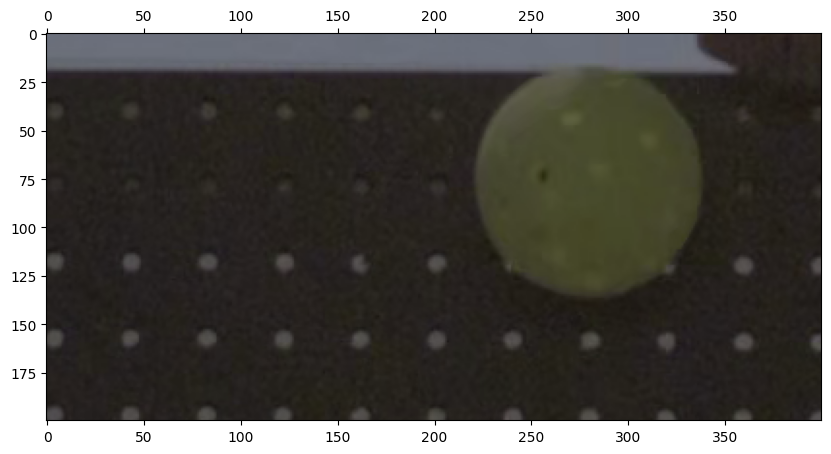

In [ ]:
view_frame(top_cropped)

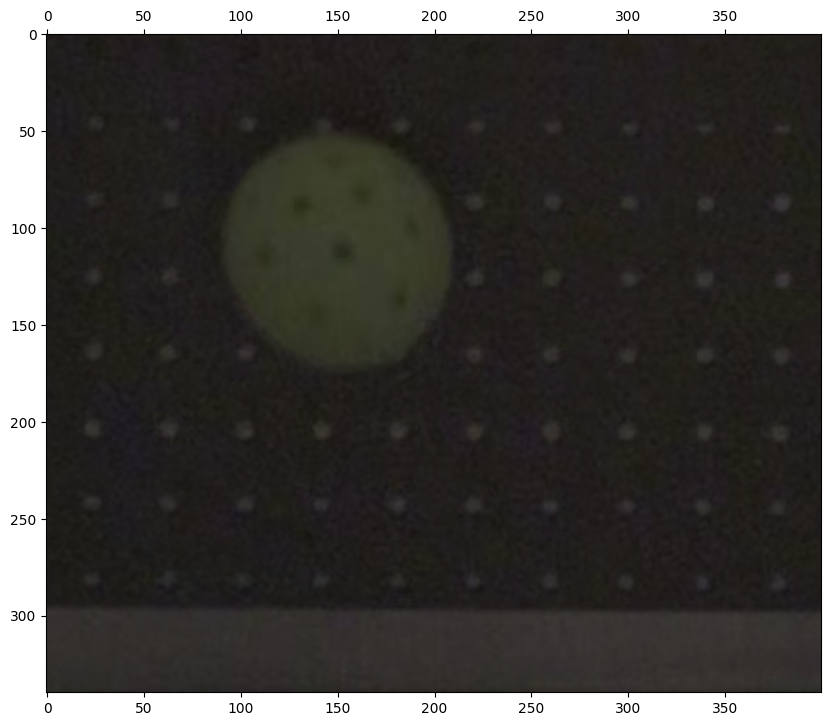

In [ ]:
view_frame(bottom_cropped)

#### For convenience - Show two frames side by side

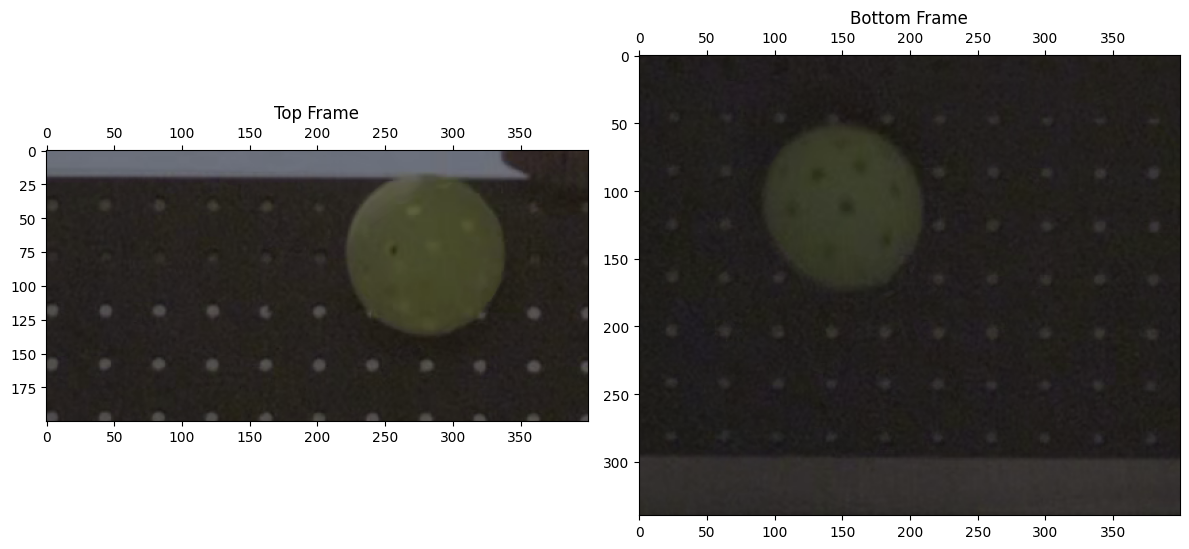

In [ ]:
show_frames_side_by_side(top_cropped, bottom_cropped, "Top Frame", "Bottom Frame")

#### Will color thresholding in HSV color space work?

Ok. let's try some magic on them. Pick what you think might work best.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Looking at your cropped frames, the ball has good color contrast against the dark pegboard. I'd suggest trying **color thresholding in HSV color space** first—it's often more robust to lighting variations than RGB, and your yellow-green ball should stand out well.

Here's the approach:
1. Convert to HSV
2. Create a mask for yellow-green colors
3. Apply the mask to isolate the ball

Want to try converting one of your cropped frames to HSV and experimenting with threshold values? You'll need to find the right range for the hue, saturation, and value channels that captures the ball.

Would you like to give it a shot, or would you prefer I show you a starting example?

example

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's a starting example to try with one of your cropped frames:

```python
hsv = cv2.cvtColor(top_cropped, cv2.COLOR_BGR2HSV)
lower_yellow_green = np.array([30, 40, 40])
upper_yellow_green = np.array([80, 255, 255])
mask = cv2.inRange(hsv, lower_yellow_green, upper_yellow_green)
```

Then display the mask to see what gets captured. You'll likely need to adjust those threshold values to get a clean isolation of the ball.

Give it a try and see what the mask looks like!

In [ ]:
hsv = cv2.cvtColor(top_cropped, cv2.COLOR_BGR2HSV)
lower_yellow_green = np.array([30, 40, 40])
upper_yellow_green = np.array([80, 255, 255])
top_mask = cv2.inRange(hsv, lower_yellow_green, upper_yellow_green)

hsv = cv2.cvtColor(bottom_cropped, cv2.COLOR_BGR2HSV)
lower_yellow_green = np.array([30, 40, 40])
upper_yellow_green = np.array([80, 255, 255])
bottom_mask = cv2.inRange(hsv, lower_yellow_green, upper_yellow_green)

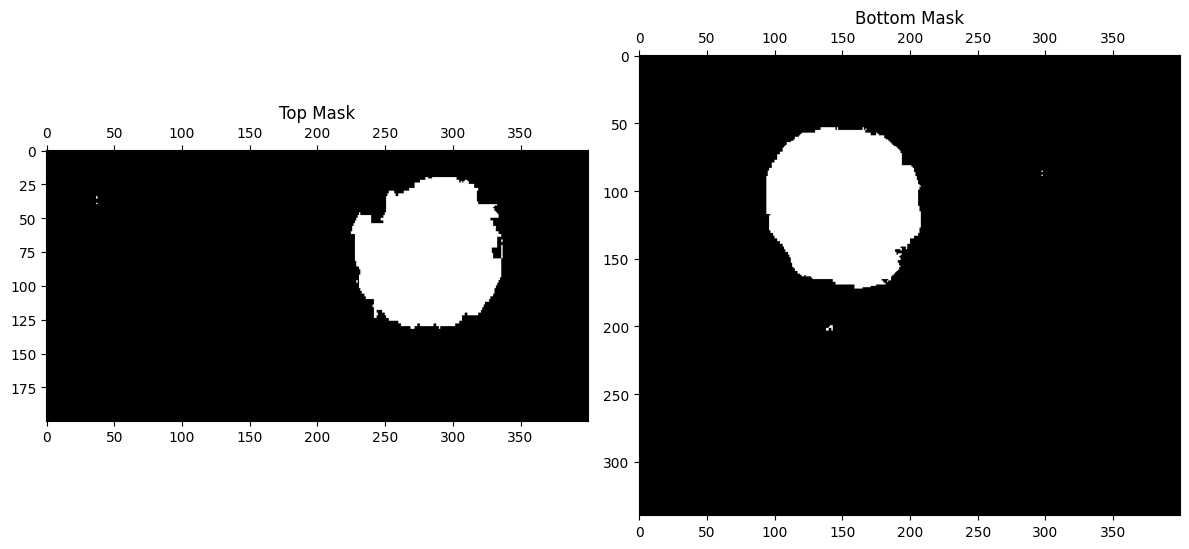

In [ ]:
show_frames_side_by_side(top_mask, bottom_mask, "Top Mask", "Bottom Mask")

#### With HSV Thresholding, we can identify the ball

#### Where is the ball?

Can those centroids be used to calculate a radius? Can we then combine the cetroids and the radii, and visually show the centroids and circles?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes! You can calculate the radius from the mask and then draw both the centroid and circle on the original frames to visualize the detection.

To find the centroid and radius, you can use `cv2.moments()` for the centroid, and for radius you could use the equivalent radius from the contour area, or find the actual contours and fit a circle.

Would you like to try writing the code to:
1. Find contours in the mask
2. Calculate centroids and radii
3. Draw them on the original frames

Or would you like me to show you an example of how to do this?

In [ ]:
top_moments = cv2.moments(top_mask)
top_cx = int(top_moments['m10'] / top_moments['m00'])
top_cy = int(top_moments['m01'] / top_moments['m00'])

bottom_moments = cv2.moments(bottom_mask)
bottom_cx = int(bottom_moments['m10'] / bottom_moments['m00'])
bottom_cy = int(bottom_moments['m01'] / bottom_moments['m00'])


In [ ]:
top_cx, top_cy, "            ", bottom_cx, bottom_cy

(282, 76, '            ', 150, 111)

i would like an example. Please make it a function, so that I can apply it to each ball.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's a function that finds the centroid and radius, then draws them on the frame:

```python
def detect_and_draw_ball(frame, mask):
    # Find centroid
    moments = cv2.moments(mask)
    cx = int(moments['m10'] / moments['m00'])
    cy = int(moments['m01'] / moments['m00'])
    
    # Find contours and fit circle for radius
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        (x, y), radius = cv2.minEnclosingCircle(largest_contour)
        radius = int(radius)
    else:
        radius = 0
    
    # Draw on frame
    result = frame.copy()
    cv2.circle(result, (cx, cy), radius, (0, 255, 0), 2)  # Green circle
    cv2.circle(result, (cx, cy), 5, (255, 0, 0), -1)  # Blue centroid dot
    
    return result, cx, cy, radius
```

Try calling it with your frames and masks to see the visualization!

In [ ]:
def detect_and_draw_ball(frame, mask):
    # Find centroid
    moments = cv2.moments(mask)
    cx = int(moments['m10'] / moments['m00'])
    cy = int(moments['m01'] / moments['m00'])
    
    # Find contours and fit circle for radius
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        (x, y), radius = cv2.minEnclosingCircle(largest_contour)
        radius = int(radius)
    else:
        radius = 0
    
    # Draw on frame
    result = frame.copy()
    cv2.circle(result, (cx, cy), radius, (0, 255, 0), 2)  # Green circle
    cv2.circle(result, (cx, cy), 5, (255, 0, 0), -1)  # Blue centroid dot
    
    return result, cx, cy, radius

In [ ]:
top_result,       top_cx,    top_cy,    top_radius = detect_and_draw_ball(top_cropped,    top_mask)
bottom_result, bottom_cx, bottom_cy, bottom_radius = detect_and_draw_ball(bottom_cropped, bottom_mask)


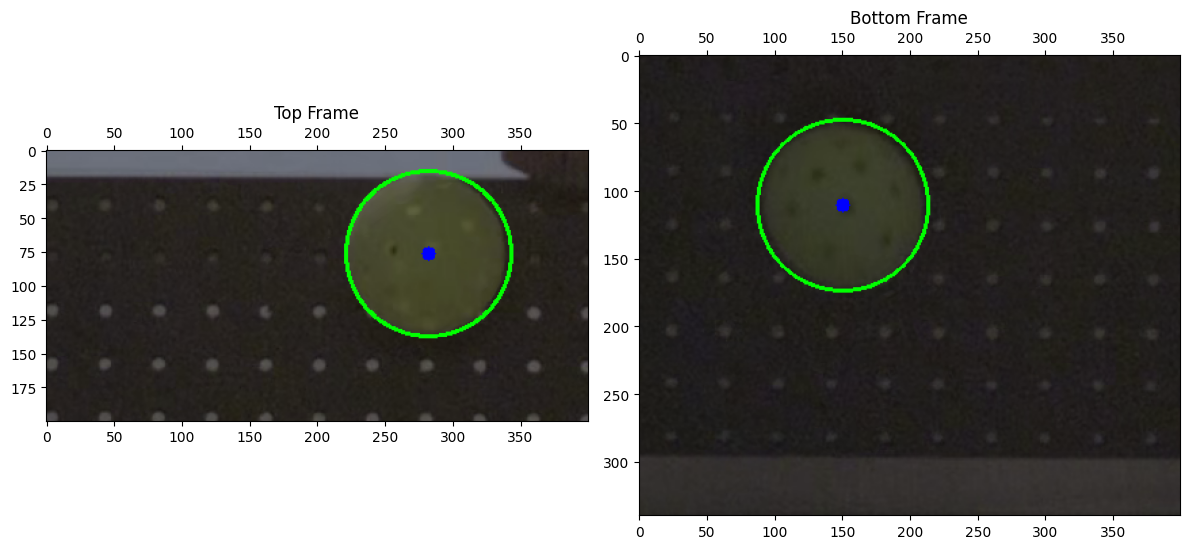

In [ ]:
show_frames_side_by_side(top_result, bottom_result, "Top Frame", "Bottom Frame")

In [ ]:
top_radius, bottom_radius

(61, 63)

That is very impressive. While we were doing this, it occured to me that maybe it makes more sense to use the tops, since they are seen at the begin of the open shutter.
For calibration purposes, though, the centroid should be fine since it is an x correction that matters.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

That's a great observation! You're right that for physics analysis, using the top of the ball would give you the position at shutter open, which is more precise timing-wise. But for the camera tilt calibration, the centroid works perfectly since you only need the horizontal (x) displacement.

So your plan is:
1. Use centroids from frames 11 and 63 to calculate the camera tilt angle
2. Once you correct for tilt, switch to tracking the top of the ball for the actual drag coefficient analysis

Does that sound right? And are you ready to calculate the tilt angle from the two centroid positions you have?

You are right with me on that. I just rethought it slightly though. We need x,y to calculate angle. We can get the x offset here. But we need to know far the ball 
dropped between the two frames. So I think we should apply the algorithm to the original two frames. (or a horizontal cropping only)

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Excellent point! You need both the x and y displacements between the two frames to calculate the tilt angle correctly. If you crop vertically, you lose the y-coordinate information you need.

So you want to:
1. Apply the detection to the full-height frames (with only horizontal cropping from 800 to 1200)
2. Get (x, y) positions for both frames
3. Calculate the angle from the displacement vector

Should you go ahead and create horizontally-cropped versions of frames 11 and 63, then run the detection on those?

How do I eliminate the vertical cropping? top_cropped = top[0:200, 800:1200]

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

To eliminate the vertical cropping, just use `:` for the y-dimension instead of `0:200`:

```python
top_cropped = top[:, 800:1200]
```

This keeps all rows (full height) while still cropping horizontally from 800 to 1200.

In [ ]:
top_cropped_full = top[:, 800:1200]
bottom_cropped_full = bottom[:, 800:1200]

Hmm. I thought that would work.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

What happened when you tried it? Did you get an error, or did the detection not work as expected?

If you're trying to run the detection on the full-height cropped frames, remember you'll need to create new masks for them since the HSV thresholding needs to be applied to these new cropped frames.

What issue are you seeing?

#### We need to eliminate the vertical cropping
It was convenient to see whether HSVT would find the ball in two clearly different lighting areas between
the top and the bottom of the frame. 

In [ ]:
##### Crop vertically only
top_cropped_full    = top   [:, 800:1200]
bottom_cropped_full = bottom[:, 800:1200]

In [ ]:
##### construct the mask for the vertically cropped frames
hsv_top = cv2.cvtColor(top_cropped_full, cv2.COLOR_BGR2HSV)
top_mask_full = cv2.inRange(hsv_top, lower_yellow_green, upper_yellow_green)

hsv_bottom = cv2.cvtColor(bottom_cropped_full, cv2.COLOR_BGR2HSV)
bottom_mask_full = cv2.inRange(hsv_bottom, lower_yellow_green, upper_yellow_green)

In [ ]:
##### Find the ball, its location and radius
top_full,       top_cx,    top_cy,    top_radius = detect_and_draw_ball(top_cropped_full,    top_mask_full)
bottom_full, bottom_cx, bottom_cy, bottom_radius = detect_and_draw_ball(bottom_cropped_full, bottom_mask_full)

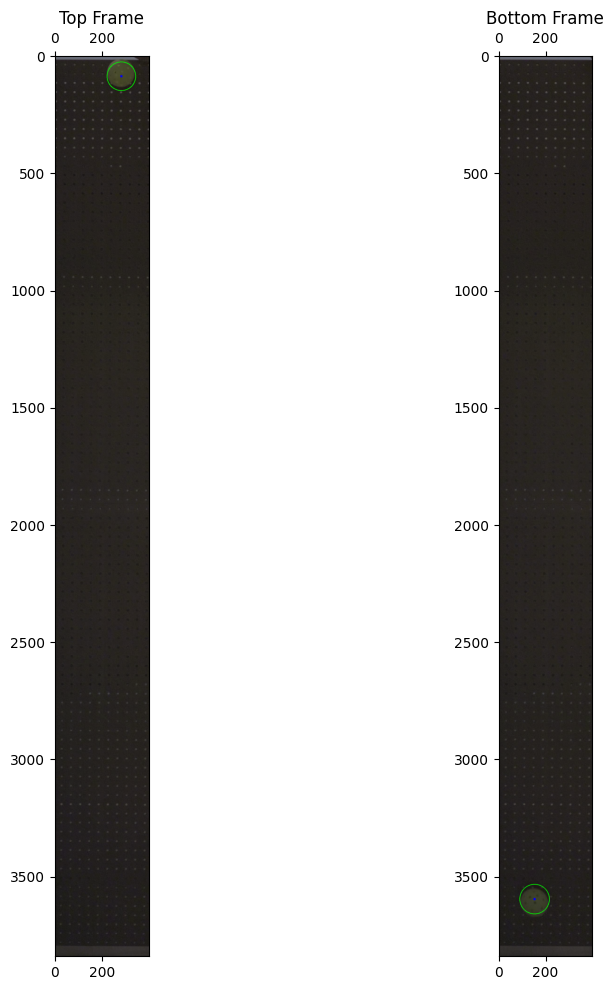

In [ ]:
show_frames_side_by_side(top_full, bottom_full, "Top Frame", "Bottom Frame")

In [ ]:
print(f"top    x {top_cx}       top y    {top_cy}       top    radius {top_radius}")
print(f"bottom x {bottom_cx}    bottom y  {bottom_cy}       bottom radius {bottom_radius}")

top    x 282       top y    90       top    radius 61
bottom x 151    bottom y  3597       bottom radius 63


#### Did the ball really fall right to left, not just down?
If you did not notice that in the two cropped images up higher, you can't miss the difference in x positions.

### We need to correct for camera out of level
We know that the ball fell straight down. Indoors. No wind. Camera on a perpendicular from the middle of the backdrop.

moved left 131 over 3507

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! So you have:
- Horizontal displacement: 131 pixels to the left
- Vertical displacement: 3507 pixels down

Now you can calculate the camera tilt angle using:
```
angle = arctan(131 / 3507)
```

This will give you the angle in radians (or use `np.degrees()` to convert to degrees). This is the angle you'll need to rotate all frames to correct for the camera tilt.

Want to calculate that angle?

In [ ]:
angle = np.arctan(131 / 3507)
np.degrees(angle)

np.float64(2.139224147431737)

### The camera was 2.14° out of level

### What about the peg board backdrop. Is it vertical?

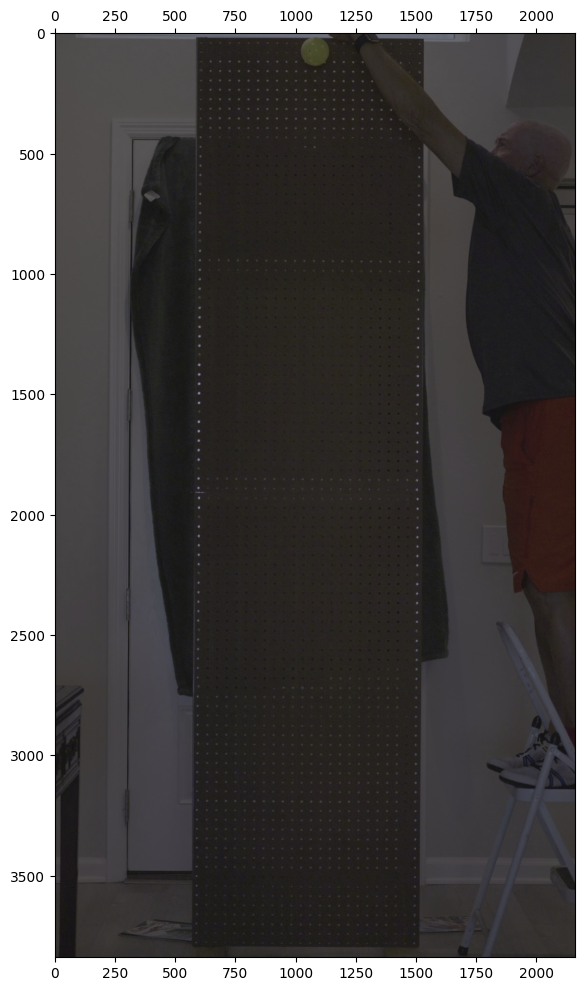

In [ ]:
view_frame(top)

#### Can we identify the holes or use the edge of the pegboard?

In [ ]:
# Take horizontal slices again, full width this time
n = 300
htop = top[:n, :]
hbot = top[-n:, :]

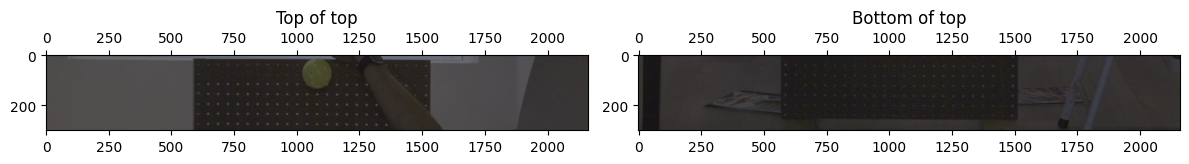

In [ ]:
show_frames_side_by_side(htop, hbot, "Top of top", "Bottom of top")

It looks like the lighting at the bottom was not our friend. There was a window behind parts of the setup, so some
holes were more obvious than others. Edge detection on he left side? It does look the the backdrop was much more vertical than the camera!

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You're right—the lighting is much better at the top! And yes, it does look like the pegboard is more vertical than the camera, which is good news for your measurements.

Edge detection on the left side could work well. You could try:
1. Crop to just the left pegboard region (maybe x from 600-1000?)
2. Apply Canny edge detection
3. Look for the peg holes as circular patterns in the edges

Or, since the top has good lighting, you could also try detecting multiple pegs in just the top region and calculate the pegboard angle from those alone.

Which approach would you like to try first?

#### Let's look closer at the left edge

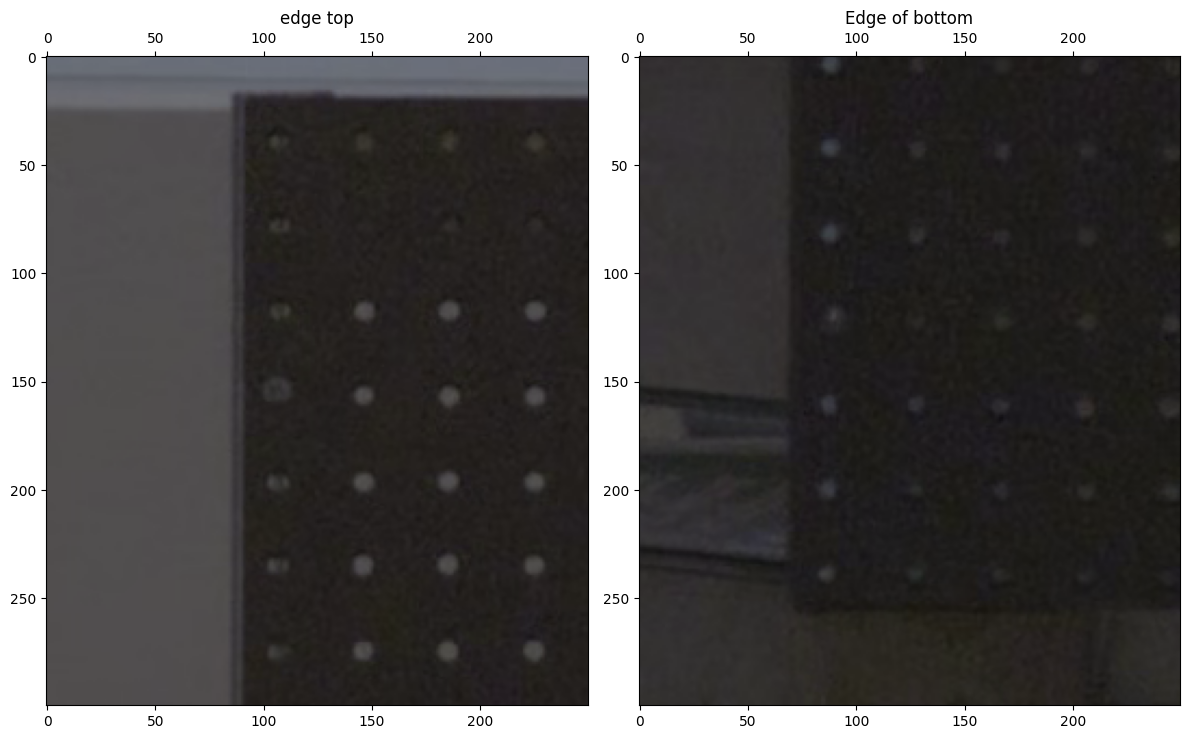

In [ ]:
left = 500
right = 750
edge_top = htop[:, left:right]
edge_bot = hbot[:, left:right]
show_frames_side_by_side(edge_top, edge_bot, "edge top", "Edge of bottom")

In [ ]:
`

###
 Can we use hough on a vertical slice?

Now what do you think?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

The top section looks great—you can clearly see the peg holes! The bottom section is much darker and harder to work with due to the lighting.

I think your best bet is to:
1. Work with just the top section where the pegs are clearly visible
2. Detect multiple peg holes in a vertical column
3. Calculate the pegboard angle from those peg positions

You could try using blob detection or Hough circles on the top section to find the peg holes. Would you like to try one of those approaches?

#### Create and view a full vertical slice near the edge

In [ ]:
left = 600
right = 800
vertical_slice = top[:, left:right]


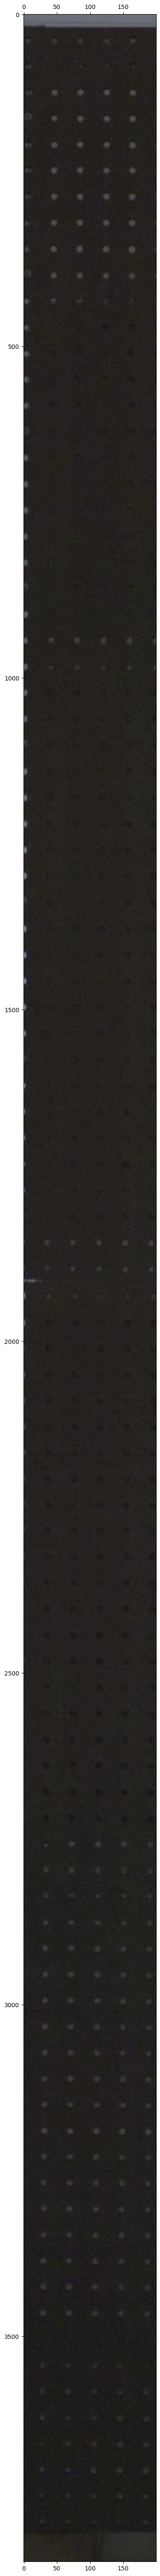

In [ ]:
view_frame(vertical_slice, h=4, w=800)

Any ideas with the vertical slice

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Nice vertical slice! You can see the peg holes running down the board. Now you have a few options:

1. **Hough circles** - Detect all the circular peg holes and extract their (x, y) positions
2. **Blob detection** - Find dark circular regions (the holes)
3. **Template matching** - If the holes are consistent, use one as a template

Since you mentioned trying Hough earlier, that might be worth attempting here. The advantage is you'd get multiple peg positions automatically, and then you could fit a line through them to measure the board's angle.

Which method would you like to try?

Glad I asked. I had not though of the line idea. Let's give Hough  a try?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's a Hough circles approach for the peg holes:

```python
gray = cv2.cvtColor(vertical_slice, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                          param1=50, param2=30, minRadius=5, maxRadius=15)
```

The parameters might need tweaking:
- `minDist=20`: minimum distance between circle centers
- `minRadius=5, maxRadius=15`: expected peg hole size range
- `param1` and `param2`: edge detection and circle detection thresholds

Try this and see how many circles it detects. You can draw them to visualize the results!

#### Hough won't be quite as easy as the HSVT was
We will play with 2 parameters to refine this.

In [ ]:
for par2 in range(1,6):
    gray = cv2.cvtColor(vertical_slice, cv2.COLOR_BGR2GRAY)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                            param1=50, param2=par2, minRadius=5, maxRadius=15)
    if circles is not None:
        print(f"No of circles {len(circles[0])} param2 value {par2}")


No of circles 685 param2 value 1
No of circles 471 param2 value 2
No of circles 340 param2 value 3
No of circles 272 param2 value 4
No of circles 193 param2 value 5


### Optimizing a hough parameter
- First we play with param 2 in order to find one that give a reasonable number of points
- When we see quite a few false positives, they were all big (our max radius started at 15

**With param2 at 7 and maxRadius at 15 nearly every hole identified seems positive.**

No of circles 60 param2 value 7


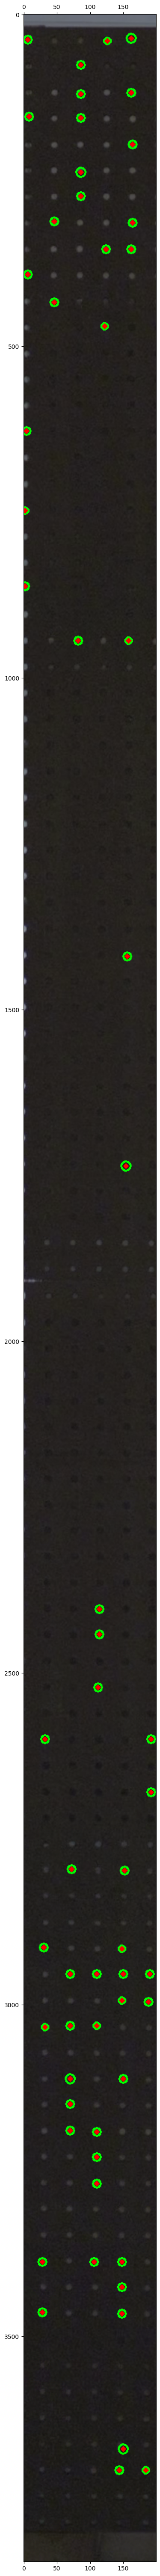

In [ ]:
par2 = 7
gray = cv2.cvtColor(vertical_slice, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                        param1=50, param2=par2, minRadius=5, maxRadius=8)
if circles is not None:
    print(f"No of circles {len(circles[0])} param2 value {par2}")

result = vertical_slice.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(result, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(result, (i[0], i[1]), 2, (0, 0, 255), 3)
view_frame(result, h=4, w=800)


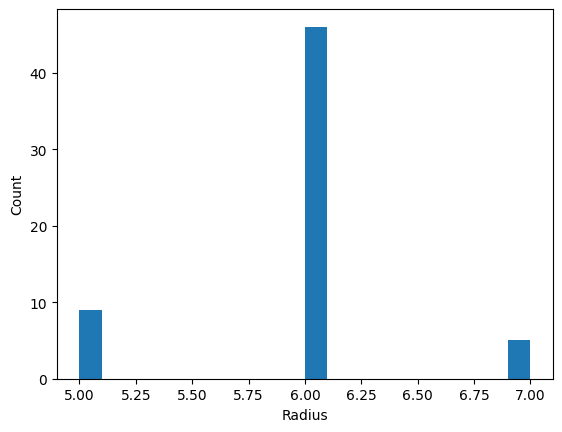

In [ ]:
if circles is not None:
    radii = circles[0, :, 2]
    plt.hist(radii, bins=20)
    plt.xlabel('Radius')
    plt.ylabel('Count')
    plt.show()

I only saw maybe 3 or 4 radius 7 circles that were slightly off, but they all were on holes, not some random feature.
This looks like a really good fit.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Excellent! So the detection is working well—finding actual peg holes and not random features. That's exactly what you want.

Now you have the (x, y) positions of all those peg holes. The next step would be to fit a line through those positions to calculate the pegboard angle.

Would you like to try fitting a line to the circle centers? You could use something like `np.polyfit()` or linear regression to find the best-fit line through the y vs x coordinates.

#### We want to use the hole positions to create best fit straight lines
But clearly there would be several straight lines.

Yes. Can it find muliple lines? :) If so, that would be amazing.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great question! `np.polyfit()` fits a single line, but if you want to detect multiple lines (like separate columns of pegs), you could:

1. **Cluster the circles by x-coordinate** first (e.g., using k-means or simple binning)
2. **Fit a separate line to each cluster**

This would give you multiple lines, one for each vertical column of pegs!

Would you like to try clustering the circles by their x-positions to separate them into columns first?

### K-Means cluster the circles

Yes. I know what k-means is. I took a course where it got one day, in about 2016. show me the code.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's code to cluster the circles by x-coordinate and fit lines to each column:

```python
from sklearn.cluster import KMeans

# Extract circle centers
centers = circles[0, :, :2]  # x, y coordinates

# Cluster by x-coordinate (adjust n_clusters based on how many columns you expect)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(centers[:, 0].reshape(-1, 1))

# Fit a line to each cluster
result_lines = vertical_slice.copy()
for cluster_id in range(4):
    cluster_points = centers[labels == cluster_id]
    if len(cluster_points) > 1:
        # Fit line: y = mx + b
        coeffs = np.polyfit(cluster_points[:, 1], cluster_points[:, 0], 1)
        
        # Draw the line
        y_min, y_max = int(cluster_points[:, 1].min()), int(cluster_points[:, 1].max())
        x_min = int(coeffs[0] * y_min + coeffs[1])
        x_max = int(coeffs[0] * y_max + coeffs[1])
        cv2.line(result_lines, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

view_frame(result_lines, h=4, w=800)
```

Try it and see if it detects the peg columns!

#### 6 Clusters worked nicely
We started with n_clusters at 4. One of the lines fit was clearly between 2 lines of holes.
On visual inspection it seemed reasonable that 6 made sense. There were 6 columns of holes.

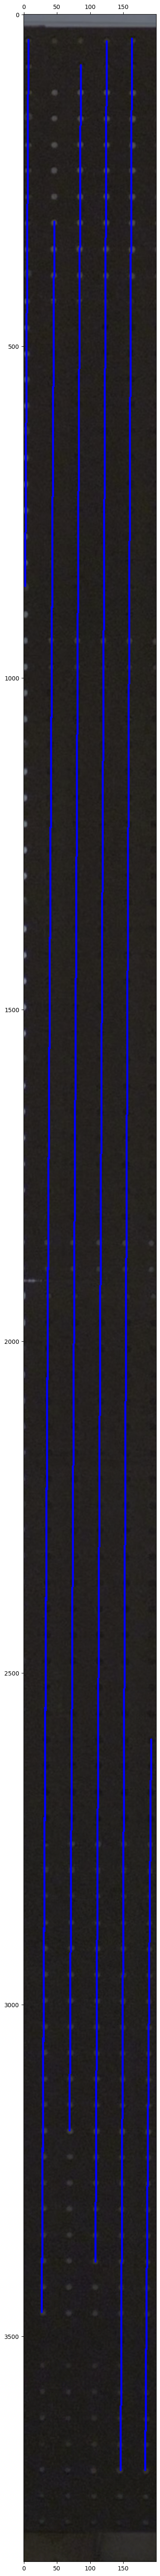

In [ ]:
from sklearn.cluster import KMeans

# Extract circle centers
centers = circles[0, :, :2]  # x, y coordinates

# Cluster by x-coordinate (adjust n_clusters based on how many columns you expect)
nclusters = 6
kmeans = KMeans(n_clusters=nclusters, random_state=42)
labels = kmeans.fit_predict(centers[:, 0].reshape(-1, 1))

# Fit a line to each cluster
result_lines = vertical_slice.copy()
for cluster_id in range(nclusters):
    cluster_points = centers[labels == cluster_id]
    if len(cluster_points) > 1:
        # Fit line: y = mx + b
        coeffs = np.polyfit(cluster_points[:, 1], cluster_points[:, 0], 1)
        
        # Draw the line
        y_min, y_max = int(cluster_points[:, 1].min()), int(cluster_points[:, 1].max())
        x_min = int(coeffs[0] * y_min + coeffs[1])
        x_max = int(coeffs[0] * y_max + coeffs[1])
        cv2.line(result_lines, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

view_frame(result_lines, h=4, w=800)

? Is the middle line a fit to the holes on its left and right?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good catch! It looks like the middle line might be fitting to holes from two different columns. This can happen if k-means decides to group them together based on their x-coordinates being close.

You could try:
1. Increasing `n_clusters` to 5 or 6 to see if it separates them better
2. Filtering out clusters with too few points
3. Looking at which holes are assigned to which cluster

Want to try adjusting the number of clusters to see if it separates those columns better?

Yeah, at most we should have 6

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Try changing `n_clusters=4` to `n_clusters=6` in your k-means code and run it again. That should separate the columns better and give you a clearer picture of each vertical line of pegs.

That said the line fitting the middle is ok, because we only want the slope. But it could be skewed if it caught them "funny" too many on one side, ...
i will try 6.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You're absolutely right—as long as you're just after the slope (angle), a line through multiple columns would still give you a reasonable estimate of the pegboard's overall tilt. But yes, if it's catching them unevenly, it could skew the result slightly.

Go ahead and try `n_clusters=6` and see how it looks!

Beautiful, before it was limiting the plotting to 4 ids. We are good to go. Let's get a distribution on the angles. How far off vertical
was the background? I am guessing maybe 1 degree

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Now let's calculate the slopes (angles) for each of the fitted lines and see the distribution.

You can extract the slope from each `coeffs[0]` value you calculated in the loop, then convert to degrees from vertical. Since the slope is dx/dy (because you fit x vs y), the angle from vertical would be `arctan(slope)`.

Want to modify your loop to collect all the slopes and then plot their distribution?

In [ ]:
print(np.bincount(labels))

[ 7 18 12  5  6 12]


I do.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's how to collect the slopes and calculate the angles:

```python
slopes = []
for cluster_id in range(nclusters):
    cluster_points = centers[labels == cluster_id]
    if len(cluster_points) > 1:
        coeffs = np.polyfit(cluster_points[:, 1], cluster_points[:, 0], 1)
        slopes.append(coeffs[0])

angles = np.degrees(np.arctan(slopes))
print(f"Angles from vertical: {angles}")
print(f"Mean angle: {np.mean(angles):.3f} degrees")
print(f"Std dev: {np.std(angles):.3f} degrees")
```

Try that and see what the pegboard angle distribution looks like!

In [ ]:
slopes = []
for cluster_id in range(nclusters):
    cluster_points = centers[labels == cluster_id]
    if len(cluster_points) > 1:
        coeffs = np.polyfit(cluster_points[:, 1], cluster_points[:, 0], 1)
        slopes.append(coeffs[0])

angles = np.degrees(np.arctan(slopes))
print(f"Angles from vertical: {angles}")
print(f"Mean angle: {np.mean(angles):.3f} degrees")
print(f"Std dev: {np.std(angles):.3f} degrees")

Angles from vertical: [-0.3356351  -0.26048826 -0.29237173 -0.43162779 -0.37871033 -0.31295674]
Mean angle: -0.335 degrees
Std dev: 0.056 degrees


Wow! Well under 1 degree. Funny story. I got some string and a weight so that I could plumb the setup 
after looking at the video. I think I only realized before starting this that it was probably all camera.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

That's fantastic! The pegboard is essentially vertical—only about 0.3 degrees off, with very consistent measurements across all columns. Your intuition was spot on that it was mostly the camera!

So now you know:
- Camera tilt: ~2.14 degrees
- Pegboard tilt: ~0.34 degrees (negligible)

This means you can confidently correct for just the camera angle when analyzing the ball's motion. The pegboard provides a great vertical reference!

What's your next step—rotating the frames to correct for the camera tilt, or moving on to tracking the ball through all frames?

## Calibrating for camera tilt
We need to both correct the pixel positions and we need physical distances

### Problem 2 - Correcting the positions for the camera tilt

I guess there are two ways to look at this. 
- We could rotate the frames. Not sure what that would look like.
- We could just collect the x,y values and transform them into a vertical x = 0, y is the measurement.
The other thing we need to do is calculate how many pixels per vertical inch. Those distances will be necessary
for the regression to get the coefficient of drag.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Excellent thinking! You're right—there are two approaches, and the second one (collecting x,y and transforming mathematically) is probably simpler and more efficient than rotating image frames.

For the transformation:
- You'd rotate each (x, y) position by the camera angle (2.14°) to get corrected coordinates
- Then you can work directly with those corrected positions

For the pixel-to-inch calibration, you know the pegboard dimensions. Do you know the spacing between peg holes? That would give you a direct measurement. Or you could measure the total height of the pegboard in the image and divide by the known 8-foot height.

Which calibration approach sounds better to you?

I meant to mention. This hole spacing is exactly one inch.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! That makes calibration straightforward. You can measure the distance (in pixels) between consecutive peg holes in your image, and that equals exactly 1 inch.

Since you already have the peg hole positions from your circle detection, you could calculate the spacing between adjacent holes in the same column and average them to get a precise pixels-per-inch conversion.

Want to try calculating that from your detected circles?

You read my mind. Do you teach physics?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Ha! No, I don't teach physics, but I enjoy helping people work through problems like this. Your experimental setup and approach are really well thought out!

So, want to calculate the pixel spacing between adjacent holes? You could sort the holes in one cluster by y-coordinate, then calculate the differences between consecutive positions and average them.

Use the cluster with the most points. Or we could average all of them.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good idea! Using the cluster with the most points would give you the most data for a robust average. Or averaging across all clusters would account for any slight variations.

Which approach do you want to try first—just the largest cluster, or calculate spacing for each cluster and then average those?

Let's do the one with 18 circles. Not sure what its id is.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You can find which cluster has 18 points by checking the bincount you printed earlier. It looks like cluster id 1 has 18 circles.

Try extracting those points, sorting by y-coordinate, and calculating the spacing:

```python
cluster_id = 1
cluster_points = centers[labels == cluster_id]
cluster_points_sorted = cluster_points[cluster_points[:, 1].argsort()]
```

Then calculate the differences between consecutive y-values and average them. Want to give it a try?

In [ ]:
cluster_id = 1
cluster_points = centers[labels == cluster_id]
cluster_points_sorted = cluster_points[cluster_points[:, 1].argsort()]

In [ ]:
cluster_points_sorted

array([[ 162,   36],
       [ 162,  118],
       [ 164,  196],
       [ 164,  314],
       [ 162,  354],
       [ 158,  944],
       [ 156, 1420],
       [ 154, 1736],
       [ 152, 2798],
       [ 148, 2916],
       [ 150, 2954],
       [ 148, 2994],
       [ 150, 3112],
       [ 148, 3388],
       [ 148, 3426],
       [ 148, 3466],
       [ 150, 3670],
       [ 144, 3702]], dtype=uint16)

How about a function that transforms them into a vertical array, then measure the spacing?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's a function to rotate the points and calculate spacing:

```python
def rotate_points(points, angle_degrees):
    angle_rad = np.radians(angle_degrees)
    cos_a, sin_a = np.cos(angle_rad), np.sin(angle_rad)
    rotation_matrix = np.array([[cos_a, -sin_a], [sin_a, cos_a]])
    return points @ rotation_matrix.T

# Rotate by the camera angle
rotated = rotate_points(cluster_points_sorted, 2.14)
y_diffs = np.diff(rotated[:, 1])
pixels_per_inch = np.mean(y_diffs)
print(f"Pixels per inch: {pixels_per_inch:.2f}")
```

Want to try that?

##### This was a false attempt at determining pixels per inch
It averaged the separation of holes, not just the ones that were one inch apart
```
def rotate_points(points, angle_degrees):
    angle_rad = np.radians(angle_degrees)
    cos_a, sin_a = np.cos(angle_rad), np.sin(angle_rad)
    rotation_matrix = np.array([[cos_a, -sin_a], [sin_a, cos_a]])
    return points @ rotation_matrix.T

# Rotate by the camera angle
rotated = rotate_points(cluster_points_sorted, 2.14)
y_diffs = np.diff(rotated[:, 1])
pixels_per_inch = np.mean(y_diffs)
print(f"Pixels per inch: {pixels_per_inch:.2f}")
```

#### Inspection of y diffs identified the problem
Code cells that showed many large diffs have been deleted

No. There is something wrong there. We should be getting something on the order of about 35. There are about 13 inches between 3000 and 3500

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You're absolutely right! Looking at the sorted points, between y=3000 and y=3500, there are several holes spanning about 500 pixels. If that's roughly 13 inches, then:

500 pixels / 13 inches ≈ 38 pixels per inch

That's much more reasonable than 215! 

The issue is that `np.mean(y_diffs)` is averaging all the gaps, including the huge ones where many holes were missed. We should be looking at the *smallest* consistent gaps, which represent the actual 1-inch spacing.

Want to try finding the minimum spacing or filtering for values around 35-40 pixels?

Yes. What if we only took gaps less than 50.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good idea! Try filtering the y_diffs to only include values less than 50:

```python
small_gaps = y_diffs[y_diffs < 50]
pixels_per_inch = np.mean(small_gaps)
print(f"Pixels per inch: {pixels_per_inch:.2f}")
```

This should give you the actual 1-inch spacing!

#### This might have been too small a sample. 
No good reason not to use all of the clusters.

In [ ]:
small_gaps = y_diffs[y_diffs < 50]
pixels_per_inch = np.mean(small_gaps)
print(f"Pixels per inch: {pixels_per_inch:.2f}")

Pixels per inch: 37.92


In [ ]:
small_gaps

array([39.89742   , 38.04818031, 39.89742   , 37.97349759, 39.97210272,
       31.753634  ])

We could rotate all of the circles, select gaps in each cluster less than 50 and combine them into one list of gaps. Take the mean of that.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Excellent idea! That would give you a much more robust calibration using all the detected holes across all clusters.

Want to write a loop that goes through each cluster, rotates the points, calculates gaps less than 50, and collects them all into one list?

That sounds like the best way. Please rewrite it that way. (i was thinking we could rotate first, but would that mess up the clustering?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good question! The clustering was done on the original x-coordinates to separate columns, so you should keep that. Rotating afterward won't affect the clusters.

Here's the code to collect gaps from all clusters:

```python
all_gaps = []
for cluster_id in range(nclusters):
    cluster_points = centers[labels == cluster_id]
    if len(cluster_points) > 1:
        # Sort by y-coordinate
        cluster_sorted = cluster_points[cluster_points[:, 1].argsort()]
        # Rotate points
        rotated = rotate_points(cluster_sorted, 2.14)
        # Calculate gaps
        gaps = np.diff(rotated[:, 1])
        # Keep only gaps < 50 (1-inch spacings)
        small_gaps = gaps[gaps < 50]
        all_gaps.extend(small_gaps)

pixels_per_inch = np.mean(all_gaps)
print(f"Pixels per inch: {pixels_per_inch:.2f}")
print(f"Number of gaps used: {len(all_gaps)}")
```

In [ ]:
all_gaps = []
for cluster_id in range(nclusters):
    cluster_points = centers[labels == cluster_id]
    if len(cluster_points) > 1:
        # Sort by y-coordinate
        cluster_sorted = cluster_points[cluster_points[:, 1].argsort()]
        # Rotate points
        rotated = rotate_points(cluster_sorted, 2.14)
        # Calculate gaps
        gaps = np.diff(rotated[:, 1])
        # Keep only gaps < 50 (1-inch spacings)
        small_gaps = gaps[gaps < 50]
        all_gaps.extend(small_gaps)

pixels_per_inch = np.mean(all_gaps)
print(f"Pixels per inch: {pixels_per_inch:.2f}")
print(f"Number of gaps used: {len(all_gaps)}")

Pixels per inch: 38.61
Number of gaps used: 15


# Calibration complete
- We can locate the ball in all of the useful frames (barring any surprises).
- We can have the data to calibrate for camera angle
- We know how to calibrate from pixels to feet.


# What is next?
- Persist time and displacement data for the falling ball
- Regress that data against the equation of motion to calculate the coefficient of drag

Done with this notebook. Please supply sufficient context of what we have done and learned.
I will post that at the start of the next notebook. There we will simply use the tools
and measurements that we have made here to persist physical time and displacement data into a csv
file. In a third notebook we can calculate the coefficient of drag.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's a summary for your next notebook:

---

## Context from Previous Work: Video Calibration and Ball Detection

### Project Goal
Empirically determine the coefficient of drag for a pickleball by analyzing high-speed video of its free fall in front of a 2'×8' pegboard backdrop.

### Video Characteristics
- File: `freefall.mp4`
- Actual frame count: 70 frames (metadata reported 74)
- Frame rate: ~54.7 fps
- Resolution: 2160×3840 pixels
- Useful frames for analysis: frames 11-63 (ball fully visible)
- Horizontal crop region: x = 800 to 1200 pixels

### Ball Detection Method
**HSV Color Thresholding** proved highly effective:
- Convert frame to HSV color space
- Threshold range: H=[30,80], S=[40,255], V=[40,255]
- Use `cv2.moments()` to find centroid (cx, cy)
- Use `cv2.findContours()` and `cv2.minEnclosingCircle()` for radius
- Function `detect_and_draw_ball(frame, mask)` returns: result image, cx, cy, radius

### Camera Calibration
**Camera tilt angle: 2.14°**
- Measured from ball positions at frames 11 and 63
- Ball fell 3507 pixels vertically, drifted 131 pixels horizontally (left)
- Angle = arctan(131/3507) = 2.14°

**Pegboard angle: 0.34° ± 0.06°** (essentially vertical, negligible)
- Used Hough circle detection on vertical slice of pegboard
- Parameters: `minDist=20, param2=7, minRadius=5, maxRadius=8`
- Detected 60 peg holes across 6 columns
- K-means clustering (n_clusters=6) separated columns
- Linear fit to each column gave consistent angles

### Spatial Calibration
**Pixels per inch: 38.61 pixels/inch**
- Pegboard holes spaced exactly 1 inch apart
- Rotated detected hole positions by camera angle (2.14°)
- Filtered for gaps < 50 pixels (adjacent holes)
- Averaged 15 measurements across all 6 columns

### Coordinate Transformation
Function `rotate_points(points, angle_degrees)` applies rotation matrix to correct for camera tilt, converting observed (x,y) to true vertical coordinates.

### Next Steps
1. Apply ball detection to all frames 11-63
2. Extract and transform (x,y,t) data
3. Convert pixel measurements to physical units (feet/inches)
4. Export time-displacement data to CSV for drag coefficient regression

---

Please produce a markdown copy of the summary above. I tried to just convert from prompt to note. That did not work and erased it. please repeat

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's the markdown summary:

```markdown
## Context from Previous Work: Video Calibration and Ball Detection

### Project Goal
Empirically determine the coefficient of drag for a pickleball by analyzing high-speed video of its free fall in front of a 2'×8' pegboard backdrop.

### Video Characteristics
- File: `freefall.mp4`
- Actual frame count: 70 frames (metadata reported 74)
- Frame rate: ~54.7 fps
- Resolution: 2160×3840 pixels
- Useful frames for analysis: frames 11-63 (ball fully visible)
- Horizontal crop region: x = 800 to 1200 pixels

### Ball Detection Method
**HSV Color Thresholding** proved highly effective:
- Convert frame to HSV color space
- Threshold range: H=[30,80], S=[40,255], V=[40,255]
- Use `cv2.moments()` to find centroid (cx, cy)
- Use `cv2.findContours()` and `cv2.minEnclosingCircle()` for radius
- Function `detect_and_draw_ball(frame, mask)` returns: result image, cx, cy, radius

### Camera Calibration
**Camera tilt angle: 2.14°**
- Measured from ball positions at frames 11 and 63
- Ball fell 3507 pixels vertically, drifted 131 pixels horizontally (left)
- Angle = arctan(131/3507) = 2.14°

**Pegboard angle: 0.34° ± 0.06°** (essentially vertical, negligible)
- Used Hough circle detection on vertical slice of pegboard
- Parameters: `minDist=20, param2=7, minRadius=5, maxRadius=8`
- Detected 60 peg holes across 6 columns
- K-means clustering (n_clusters=6) separated columns
- Linear fit to each column gave consistent angles

### Spatial Calibration
**Pixels per inch: 38.61 pixels/inch**
- Pegboard holes spaced exactly 1 inch apart
- Rotated detected hole positions by camera angle (2.14°)
- Filtered for gaps < 50 pixels (adjacent holes)
- Averaged 15 measurements across all 6 columns

### Coordinate Transformation
Function `rotate_points(points, angle_degrees)` applies rotation matrix to correct for camera tilt, converting observed (x,y) to true vertical coordinates.

### Next Steps
1. Apply ball detection to all frames 11-63
2. Extract and transform (x,y,t) data
3. Convert pixel measurements to physical units (feet/inches)
4. Export time-displacement data to CSV for drag coefficient regression
```